# Task 2.2 - Data Insights

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [28]:
transactions = pd.read_csv("../Data/transactions.csv")
customer_address = pd.read_csv("../Data/customer_address.csv")
customer_demographic = pd.read_csv("../Data/customer_demographic.csv")

In [36]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20


In [30]:
customer_address.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [31]:
customer_demographic.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,missing_job_title,missing_job_industry,age,age_bins
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,0,0,66,60-69
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,0,39,30-39
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0,0,66,60-69


## Exploratory Data Analysis

### Transaction dataset

#### Products

In [18]:
# Check what product_id most sold
transactions['product_id'].value_counts()

0      1154
3       349
1       305
38      267
35      261
       ... 
71      134
16      134
8       132
100     126
47      118
Name: product_id, Length: 101, dtype: int64

In [24]:
transactions[transactions['product_id']==0].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
34,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
39,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
54,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10
60,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,1993-10-02
63,64,0,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,2006-11-10


#### Monthly sales

In [38]:
# Let's check the month
transactions['month'] = transactions['transaction_date'].dt.month
date_grouped = transactions.groupby('month').agg({'list_price':['sum','count']}).reset_index()
date_grouped.head()

month  list_price      
                sum count
0     1  1813840.55  1632
1     2  1744536.31  1578
2     3  1752618.98  1597
3     4  1791861.52  1613
4     5  1864538.66  1641

<AxesSubplot:xlabel='month', ylabel='sum'>

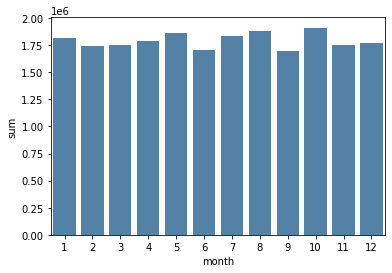

In [49]:
sns.barplot(x=date_grouped['month'],y=date_grouped['list_price']['sum'], color='steelblue')

#### Online order

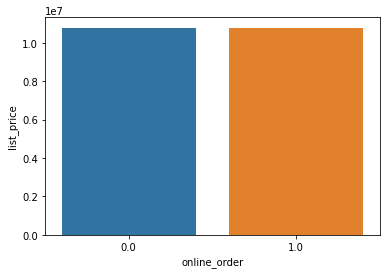

In [69]:
online_order = transactions.groupby('online_order')['list_price'].sum().reset_index()

sns.barplot(x='online_order', y='list_price', data=online_order)
plt.show()

#### Order status

In [71]:
transactions['order_status'].value_counts()

Approved     19270
Cancelled      172
Name: order_status, dtype: int64

#### Brand

In [74]:
# Let's compare the brand sales, revenue and profit
brand = transactions.groupby('brand').agg({'list_price':['sum','count'], 'standard_cost':'sum'}).reset_index()
brand['profit'] = brand['list_price']['sum'] - brand['standard_cost']['sum']
brand.head()

brand  list_price       standard_cost      profit
                          sum count           sum            
0  Giant Bicycles  4007214.41  3244    2466049.16  1541165.25
1  Norco Bicycles  2613603.92  2862    1760442.40   853161.52
2      OHM Cycles  2934269.80  2992    1480782.62  1453487.18
3           Solex  4398128.72  4168    2042402.60  2355726.12
4   Trek Bicycles  3474769.01  2931    1667447.91  1807321.10

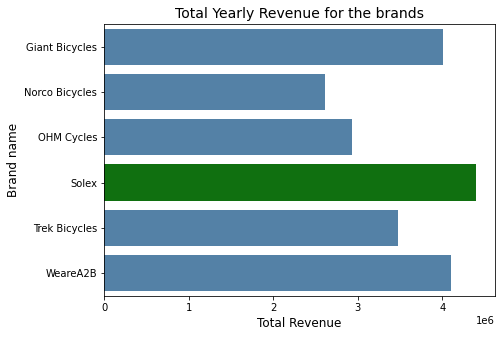

In [91]:
# Brand Revenue
plt.figure(figsize=(7,5))
clrs = ['steelblue' if (x < max(brand['list_price']['sum'])) else 'green' for x in brand['list_price']['sum']]

sns.barplot(y=brand['brand'], x=brand['list_price']['sum'], palette=clrs)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Brand name', fontsize=12)
plt.title('Total Yearly Revenue for the brands', fontsize=14)
plt.show()

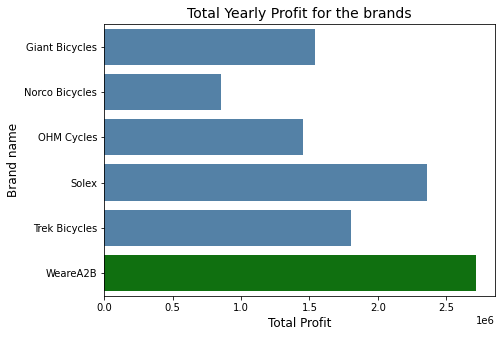

In [92]:
# Brand Profit
plt.figure(figsize=(7,5))
clrs = ['steelblue' if (x < max(brand['profit'])) else 'green' for x in brand['profit']]
sns.barplot(y=brand['brand'], x=brand['profit'], palette=clrs)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('Brand name', fontsize=12)
plt.title('Total Yearly Profit for the brands', fontsize=14)
plt.show()

#### Product line

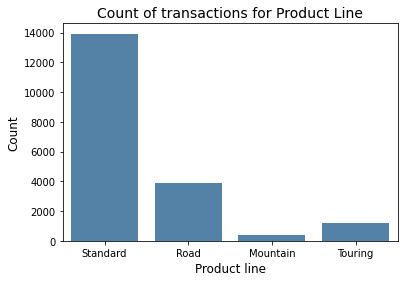

In [103]:
sns.countplot(transactions['product_line'], color='steelblue')
plt.xlabel('Product line', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of transactions for Product Line', fontsize=14)
plt.show()

#### Product class

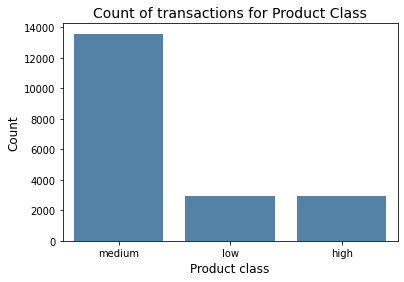

In [104]:
sns.countplot(transactions['product_class'], color='steelblue')
plt.xlabel('Product class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of transactions for Product Class', fontsize=14)
plt.show()

#### Product size

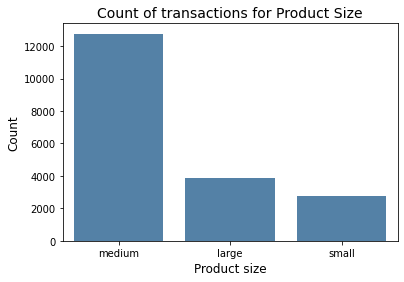

In [106]:
sns.countplot(transactions['product_size'], color='steelblue')
plt.xlabel('Product size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of transactions for Product Size', fontsize=14)
plt.show()

#### List price

In [99]:
transactions['list_price'].describe()

count    19442.000000
mean      1107.429884
std        582.655811
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

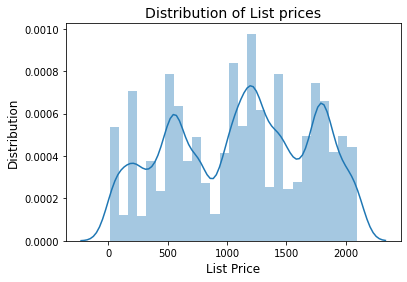

In [107]:
sns.distplot(transactions['list_price'])
plt.xlabel('List Price', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.title('Distribution of List prices', fontsize=14)
plt.show()

#### Top 10 most selled Product

In [114]:
best_products = transactions.groupby(['brand','product_line','product_class','product_size'])['product_id'].count().reset_index()
best_products.sort_values('product_id', inplace=True, ascending=False)
best_products.head(10)

,brand,product_line,product_class,product_size,product_id
31,Solex,Standard,medium,medium,1989
45,WeareA2B,Standard,medium,medium,1921
22,OHM Cycles,Standard,medium,medium,1066
5,Giant Bicycles,Standard,medium,medium,789
4,Giant Bicycles,Standard,medium,large,748
40,Trek Bicycles,Standard,medium,large,665
15,Norco Bicycles,Standard,medium,medium,591
2,Giant Bicycles,Standard,high,medium,578
20,OHM Cycles,Standard,high,medium,561
11,Norco Bicycles,Road,medium,medium,505


#### Distribution of list price for product line, product class and product size

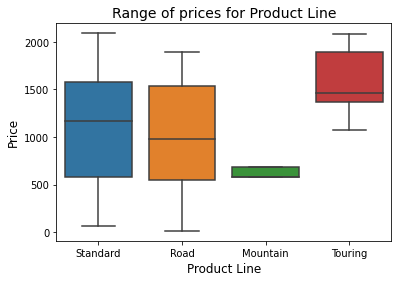

In [129]:
sns.boxplot(x='product_line', y='list_price', data=transactions)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Range of prices for Product Line', fontsize=14)
plt.show()

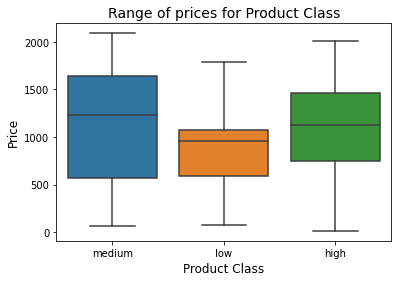

In [131]:
sns.boxplot(x='product_class', y='list_price', data=transactions)
plt.xlabel('Product Class', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Range of prices for Product Class', fontsize=14)
plt.show()

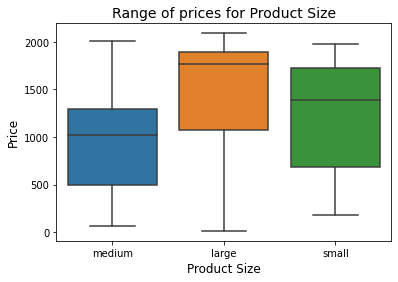

In [134]:
sns.boxplot(x='product_size', y='list_price', data=transactions)
plt.xlabel('Product Size', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Range of prices for Product Size', fontsize=14)
plt.show()

#### RFM Values

In [135]:
customer_demographic.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,missing_job_title,missing_job_industry,age,age_bins
0,1,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,0,0,66,60-69
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,0,0,39,30-39
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,0,0,66,60-69
3,4,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,1,0,58,50-59
4,5,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,0,1,43,40-49
